## Estudos Base Corona Vírus do DataSUS

***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [ ]:
!pip install seaborn

### Análise Exploratória nos Dados

In [16]:
df = pd.read_csv('bases/covid19/arquivo_geral.csv', sep=';')

In [3]:
df.head(5)

,regiao,estado,data,casosNovos,casosAcumulados,obitosNovos,obitosAcumulados
0,Norte,RO,2020-01-30,0,0,0,0
1,Norte,RO,2020-01-31,0,0,0,0
2,Norte,RO,2020-02-01,0,0,0,0
3,Norte,RO,2020-02-02,0,0,0,0
4,Norte,RO,2020-02-03,0,0,0,0


In [22]:
df['data'] = pd.to_datetime(df['data'], format='%Y-%m-%d')

In [5]:
df.groupby('regiao').sum()['casosNovos'].reset_index().sort_values('casosNovos')

,regiao,casosNovos
0,Centro-Oeste,3388
4,Sul,6026
2,Norte,17362
1,Nordeste,35641
3,Sudeste,52298


In [41]:
df['casosNovosLog'] = df['casosNovos'].apply(np.log1p)

In [42]:
df['casosNovos'].describe()

count    2619.000000
mean       43.801069
std       160.150873
min         0.000000
25%         0.000000
50%         0.000000
75%        22.000000
max      2670.000000
Name: casosNovos, dtype: float64

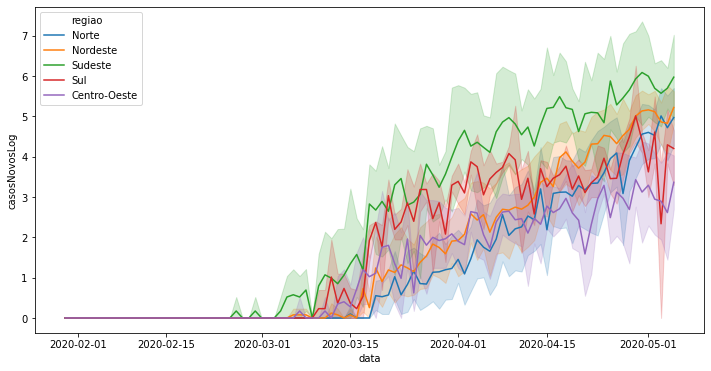

In [43]:
fig, ax = plt.subplots(figsize=(12,6))

sn.lineplot(x='data', y='casosNovosLog', data=df, hue='regiao', ax=ax)

plt.show()

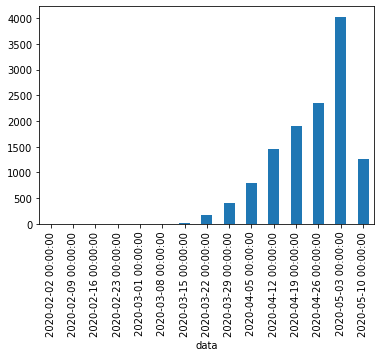

In [7]:
df[df['estado'] == 'RJ'].groupby(pd.Grouper(key='data', freq='W')).sum()['casosNovos'].plot(kind='bar')